# Resolución de Ecuaciones (Matemáticas 2. GII/I2ADE)


## Indice

- Teorema de Bolzano
- Método de la Bisección
- Método del Punto fijo
- Método de la Secante
- Método de Newton
- Descenso por gradiente - Lineal (NUMPY)
- Descenso por gradiente - No Lineal (NUMPY)
- Descenso por gradiente - Lineal (SYMPY)


## Cargar librerías necesarias


Recordar que la carga de librerías debe ser hecho solamente una vez y no en todas las celdas de código.


In [ ]:
import sympy
from sympy.abc import x, y, z
import matplotlib.pyplot as plt
import numpy as np
from sympy.plotting import plot as sypltot  # Liberia para las gráficas


## Teorema de Bolzano


Una forma muy simples de comprobar el teorema de Bolzano es multiplicar f(a) y f(b) y si su valor es menor de 0 entonces se confirma la conservación de signo. Esto porque el teorema de Bolzano exige que la función en un punto sea positiva y en el otro negativa, por lo tanto, siempre que se multiplica un valor positivo por un negativo el resultado es siempre negativo. En el caso que el resultado de la multiplicación sea negativo es porque se cumple Bolzano.


In [ ]:
def bolzano(funcion, puntoA, puntoB):
    """Funciona con funciones del tipo sympy con "x" como variable"""
    if (funcion.subs(x, puntoA) * funcion.subs(x, puntoB)) < 0:
        return True
    return False


def bolzano_numerico(funcion, puntoA, puntoB):
    """Funciona con funciones del tipo numéricas ("lambdas" o "def").
    En este caso no es necesario tener en cuenta el nombre de la variable"""
    if (funcion(puntoA) * funcion(puntoB)) < 0:
        return True
    return False


Usemos una función básica para confirmar el teorema de Bolzano.


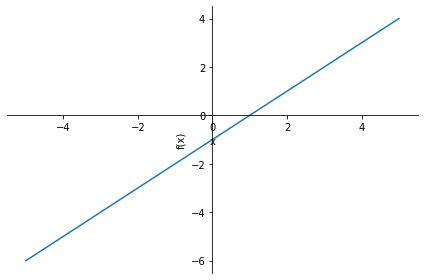

In [ ]:
# Función a usar en el ejemplo
f = x - 1
# Verifiquemos visualmente
sypltot(f, (x, -5, 5))


Sabemos entonces que $f(x)$ es:

- negativa cuando $x < 1$
- positiva cuando $x > 1$


In [ ]:
# Prueba 1
bolzano(f, 0, 2)


True

In [ ]:
# Prueba 2
bolzano(f, 2, 4)


False

In [ ]:
# Prueba 3
bolzano(f, 2, 0)


True

In [ ]:
# Prueba 4
bolzano(f, -1, 0)


False

In [ ]:
# Probemos con la versión numérica
def f_n(x):
    return x - 1


bolzano_numerico(f_n, 0, 2)


True

Vemos entonces que la implementación está a funcionar correctamente.


## Método de la Bisección


Este es el método más simples y convergente (al confirmar Bolzano en cada paso) de buscar una raíz. Cada iteración se divide por la mitad la distancia entre A y B y se cambia A o B por C (el que tenga el mismo signo) hasta encontrar el 0.


### Implementación del algoritmo de clase (sin visualización)


In [ ]:
# Abordaje numérica
def bisecion(f, puntoA, puntoB, epsilon=0.0001, delta=0.0001, n=100):
    i = 0  # Empezamos a contar desde 0 por estándar

    # La diferencia entre los puntos tiene que ser menor que delta (que no sea tan pequeña que sea difícil computar/tenga precisión necesaria)
    h = abs(puntoB - puntoA)
    # Primera "división" del espacio entre A y B por 2
    c = (puntoA + puntoB) / 2

    # En Python no hay do...while. Por lo tanto hay que invertir pseudocódigo visto en clase. Aquí solo avanza si TODAS las variables son verdaderas.
    while abs(f(c)) >= epsilon and h >= delta and i < n:
        # Forma rápida de confirmar Bolzano para sustituir. En el caso que el punto A y C tengan signos distintos de sustituí B por C (se aproxima el punto B al A).
        if bolzano_numerico(f, puntoA, c):
            puntoB = c
        else:
            # Caso no haya Bolzano entre A y C se procede a cambiar A por C (se aproxima el punto A al B)
            puntoA = c
        h = abs(puntoB - puntoA)
        # Se vuelve a "dividir por la mitad" la distancia entre los puntos
        c = (puntoA + puntoB) / 2
        i += 1  # Se hace avanzar el contador de bucles máximo
    # Devuelve una tupla con de valor de c, f(c) e la cantidad de bucles que ha hecho.
    return (
        c,
        f(c),
        i,
    )


In [ ]:
bisecion(f_n, 0, 10)


(1.00006103515625, 6.103515625e-05, 14)

Este proceso puede ser difícil de entender. Veamos visualmente, paso por paso, qué ha pasado con los puntos en cada iteración.


### Implementación del algoritmo de clase (con visualización)


(1.0009765625, 0.0009765625, 10)

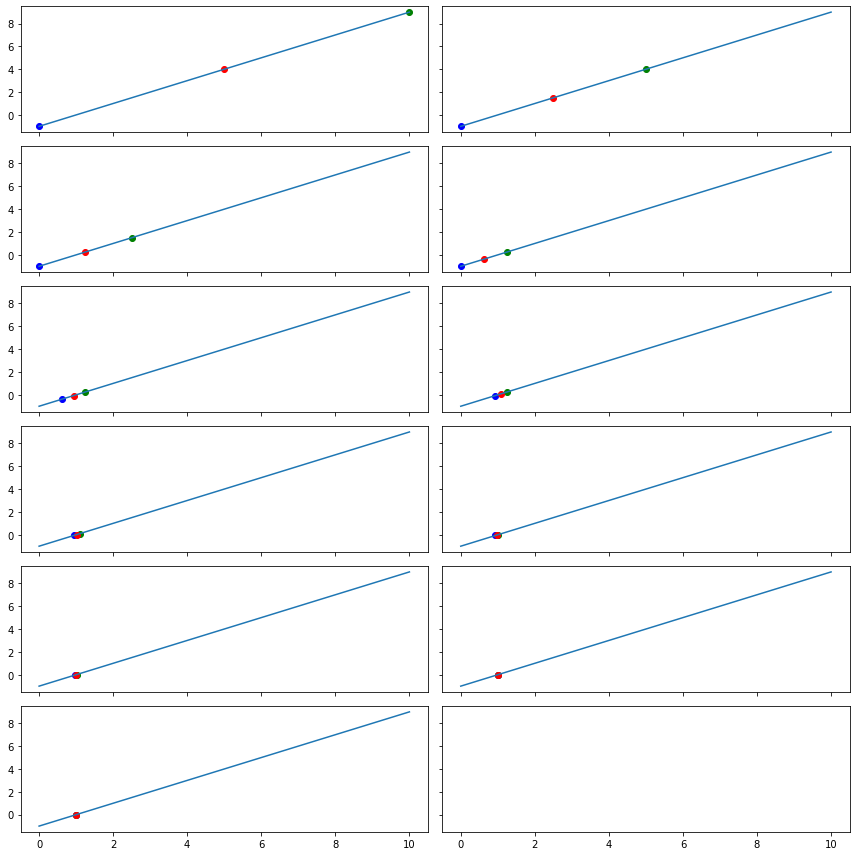

In [ ]:
# Abordaje numérica con visualización
import math


def bisecion_vis(f, puntoA, puntoB, epsilon=0.001, delta=0.001, n=100):
    i = 0
    h = abs(puntoB - puntoA)
    c = (puntoA + puntoB) / 2
    calculos_intermedios = [
        (puntoA, puntoB, c)
    ]  # Para guardar los cálculos intermedios

    exis = np.linspace(
        puntoA, puntoB
    )  # Generamos un vector de 50 valores equidistantes entre puntoA y puntoB. Esto nos servirá para representar visualmente la función en la gráfica

    # Los mismos cálculos que la función vista anteriormente pero con el añadido del vector de los cálculos intermedios
    while abs(f(c)) >= epsilon and h >= delta and i < n:
        if bolzano_numerico(f, puntoA, c):
            puntoB = c
        else:
            puntoA = c
        h = abs(puntoB - puntoA)
        c = (puntoA + puntoB) / 2
        i += 1
        calculos_intermedios.append(
            (puntoA, puntoB, c)
        )  # Guardamos los cálculos intermedios

    # Empieza la representación visual

    # Se crea un subplot para que cada bucle tenga su gráfica
    fig, ax = plt.subplots(
        math.ceil(
            len(calculos_intermedios) / 2
        ),  # Permite que la función genere cuantas sub-gráficas sean necesarias para representar visualmente la función, en dos columnas (por eso se divide por 2)
        2,
        figsize=(12, 12),
        sharex=True,
        sharey=True,
    )
    pos = (
        ax.flat
    )  # Devuelve la referencia a las gráficas (que en este momento están "vacías") para que puedan ser iteradas y inicializadas

    for ci in calculos_intermedios:
        ntxp = next(
            pos
        )  # Obtenemos la gráfica a ser usada. El mecanismo usado es una iteración y el sistema nos va dando la posición automáticamente
        ntxp.scatter(ci[0], f(ci[0]), c=["b"])  # Dibujamos punto A a azul ("b")
        ntxp.scatter(ci[1], f(ci[1]), c=["g"])  # Dibujamos punto B a verde ("g")
        ntxp.scatter(ci[2], f(ci[2]), c=["r"])  # Dibujamos punto C
        # exis = np.linspace(ci[0], ci[1])
        ntxp.plot(exis, f(exis))  # Dibujamos la función
    fig.tight_layout()  # Para que sea visualmente homogéneo

    return (c, f(c), i)


bisecion_vis(f_n, 0, 10)


Podemos entonces observar que a cada paso el algoritmo está escogiendo el punto medio entre A y B y cambiando uno de estos por ese punto de manera a preservar el teorema de Bolzano.

Puedes ver esto con más precisión si comentas el trozo `sharex=True, sharey=True` y descomentas `exis = np.linspace(ci[0], ci[1])`. Observa el eje de las $x$ y $y$ y verás como se aproxima del 1 a cada paso.


No obstante, la librería **Scipy** nos ofrece una función que implementa la bisección.

### Método de la librería Scipy


In [ ]:
from scipy.optimize import bisect

bisect(f_n, 0, 10)  # nos devuelve el valor del X


1.0000000000002274

## Método del Punto Fijo


In [ ]:
# punto fijo numérico
def punto_fijo_numerico(g, x, epsilon=0.0001, delta=0.0001, n=100):
    # Inicializamos las variables
    i = 0
    h = delta + 1
    # El cálculo se hace en la ejecución de cada bucle y se genera el valor del nuevo "x" al final del bucle.
    while abs(g(x)) > epsilon and h > delta and i < n:
        # Calculamos el error
        h = abs(g(x) - x)
        # Imprimimos los cálculos hechos (como en teoría)
        print(
            f"Iteración: {i}",
            f"Expresión: g({x:.14f})",
            f"Resultado: {g(x):.9f}",
            f"Error: {h:.9f}",
            sep="\t",
        )
        # Preparamos las variables para el próximo bucle
        x = g(x)
        i += 1
    # Se devuelve el "x" y la cantidad de iteraciones
    return (x, i - 1)


In [ ]:
# Probemos con el ejemplo de la clase teórica
punto_fijo_numerico(np.cos, 0, delta=0.01)


Iteración: 0	Expresión: g(0.00000000000000)	Resultado: 1.000000000	Error: 1.000000000
Iteración: 1	Expresión: g(1.00000000000000)	Resultado: 0.540302306	Error: 0.459697694
Iteración: 2	Expresión: g(0.54030230586814)	Resultado: 0.857553216	Error: 0.317250910
Iteración: 3	Expresión: g(0.85755321584639)	Resultado: 0.654289790	Error: 0.203263425
Iteración: 4	Expresión: g(0.65428979049778)	Resultado: 0.793480359	Error: 0.139190568
Iteración: 5	Expresión: g(0.79348035874257)	Resultado: 0.701368774	Error: 0.092111585
Iteración: 6	Expresión: g(0.70136877362276)	Resultado: 0.763959683	Error: 0.062590909
Iteración: 7	Expresión: g(0.76395968290065)	Resultado: 0.722102425	Error: 0.041857258
Iteración: 8	Expresión: g(0.72210242502671)	Resultado: 0.750417762	Error: 0.028315337
Iteración: 9	Expresión: g(0.75041776176376)	Resultado: 0.731404042	Error: 0.019013719
Iteración: 10	Expresión: g(0.73140404242251)	Resultado: 0.744237355	Error: 0.012833312
Iteración: 11	Expresión: g(0.74423735490056)	Resultad

(0.7356047404363474, 11)

In [ ]:
# Otro ejemplo de la clase teórica: f(x): e**(-x)-x
punto_fijo_numerico(lambda x: np.exp(-x), 1, delta=0.001)


Iteración: 0	Expresión: g(1.00000000000000)	Resultado: 0.367879441	Error: 0.632120559
Iteración: 1	Expresión: g(0.36787944117144)	Resultado: 0.692200628	Error: 0.324321186
Iteración: 2	Expresión: g(0.69220062755535)	Resultado: 0.500473501	Error: 0.191727127
Iteración: 3	Expresión: g(0.50047350056364)	Resultado: 0.606243535	Error: 0.105770035
Iteración: 4	Expresión: g(0.60624353508560)	Resultado: 0.545395786	Error: 0.060847749
Iteración: 5	Expresión: g(0.54539578597503)	Resultado: 0.579612336	Error: 0.034216550
Iteración: 6	Expresión: g(0.57961233550338)	Resultado: 0.560115461	Error: 0.019496874
Iteración: 7	Expresión: g(0.56011546136109)	Resultado: 0.571143115	Error: 0.011027654
Iteración: 8	Expresión: g(0.57114311508018)	Resultado: 0.564879347	Error: 0.006263768
Iteración: 9	Expresión: g(0.56487934739105)	Resultado: 0.568428725	Error: 0.003549378
Iteración: 10	Expresión: g(0.56842872502906)	Resultado: 0.566414733	Error: 0.002013992
Iteración: 11	Expresión: g(0.56641473314688)	Resultad

(0.5669089119214953, 12)

## Método de la Secante


In [ ]:
# Abordaje numérica
def secante(f, puntoA, puntoB, epsilon=0.0001, delta=0.0001, n=100):
    i = 0  # Empezamos a contar desde 0
    h = (f(puntoA) * (puntoB - puntoA)) / (
        f(puntoB) - f(puntoA)
    )  # Para el cálculo del limite de tolerancia
    c = puntoA - h  # Punto donde y = 0
    while (
        abs(f(c)) > epsilon and abs(h) > delta and i < n
    ):  # En Python no hay do...while. Por lo tanto hay que invertir pseudocódigo visto en clase. Aquí solo avanza si TODAS las variables son verdaderas.
        if abs(f(puntoA)) > abs(f(puntoB)):
            # Se intercambia para que tenga siempre una pendiente y sea cada vez más cerca de y = 0
            puntoA, puntoB = puntoB, puntoA
        h = (f(puntoA) * (puntoB - puntoA)) / (
            f(puntoB) - f(puntoA)
        )  # Para el cálculo del limite de tolerancia y el punto c
        c = puntoA - h  # Calculamos nuevo punto fijo
        print(
            f"i: {i} a: {puntoA:.3f} b: {puntoB:.3f} c: {c:.3f} h: {h:.3f} f(a): {f(puntoA):.3f} f(b): {f(puntoB):.3f} f(c): {f(c):.3f}"
        )  # Representamos los resultados de los cálculos
        puntoB = c
        i += 1  # Se hace avanzar el contador de bucles
    return (
        c,
        f(c),
        i - 1,
    )  # Se devuelve una tupla con de valor de X, f(X) e la cantidad de bucles que ha hecho.


In [ ]:
xis, fn, iter = secante(lambda x: x**2 - 4, -1, 4, epsilon=0.05, delta=0.01, n=6)
print(f"He encontrado una raíz en x = {xis} en {iter} iteraciones")


i: 0 a: -1.000 b: 4.000 c: 0.000 h: -1.000 f(a): -3.000 f(b): 12.000 f(c): -4.000
i: 1 a: -1.000 b: 0.000 c: -4.000 h: 3.000 f(a): -3.000 f(b): -4.000 f(c): 12.000
i: 2 a: -1.000 b: -4.000 c: -1.600 h: 0.600 f(a): -3.000 f(b): 12.000 f(c): -1.440
i: 3 a: -1.600 b: -1.000 c: -2.154 h: 0.554 f(a): -1.440 f(b): -3.000 f(c): 0.639
i: 4 a: -2.154 b: -1.600 c: -1.984 h: -0.170 f(a): 0.639 f(b): -1.440 f(c): -0.065
i: 5 a: -1.984 b: -2.154 c: -1.999 h: 0.016 f(a): -0.065 f(b): 0.639 f(c): -0.002
He encontrado una raíz en x = -1.9993904297470284 en 5 iteraciones


### De la librería Scipy


In [ ]:
from scipy.optimize import root_scalar

root_scalar(
    lambda x: x**2 - 4, x0=-1, x1=4, method="secant"
)  # El valor de la raíz está en "root"


      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 2.0

## Método de Newton


In [ ]:
from scipy.misc import derivative  # Para calcular la derivada en un punto


# Abordaje numérica
def Newton(f, puntoA, epsilon=0.0001, delta=0.0001, n=100):
    i = 0
    # Calculamos valores iniciales para poder entrar en el bucle. Esto corresponde a la iteración 0.
    h = f(puntoA) / derivative(f, puntoA)
    c = puntoA - h

    while abs(f(c)) > epsilon and abs(h) > delta and i < n:
        h = f(puntoA) / derivative(f, puntoA)
        c = puntoA - h
        print(
            f"i: {i} a: {puntoA:.3f} c: {c:.3f} h: {h:.3f} f(a): {f(puntoA):.3f} f(c): {f(c):.3f}"
        )
        # Actualizamos para el proximo bucle 
        puntoA = c
        i += 1
    return (c,i-1)


In [ ]:
Newton(lambda x: x**2 + 4 * x - 5, -1, 0.05, 0.01, 6)


i: 0 a: -1.000 c: 3.000 h: -4.000 f(a): -8.000 f(c): 16.000
i: 1 a: 3.000 c: 1.400 h: 1.600 f(a): 16.000 f(c): 2.560
i: 2 a: 1.400 c: 1.024 h: 0.376 f(a): 2.560 f(c): 0.142
i: 3 a: 1.024 c: 1.000 h: 0.023 f(a): 0.142 f(c): 0.001


(1.0000915541313802, 3)

### De la librería Scipy


In [ ]:
from scipy.optimize import newton

# Aunque scipy tiene una función para calcular la derivada en un punto, no tiene ninguna producir una derivada simbólica
# por lo tanto es necesario incluir manualmente la derivada en el argumento "fprime"
newton(lambda x: x**2 + 4 * x - 5, -1, fprime=lambda x: 2 * x + 4)


1.0

## Descenso por gradiente - Lineal (NUMPY)


En esta implementación usaremos el poder de Numpy para simplificar el cálculo de funciones con múltiples variables.

Tal como se observa de la teoría, el algoritmo del descenso por gradiente se puede resumir a operaciones vectoriales en un bucle.

Abajo está la implementación junto con ejemplos para funciones con una y dos variables, y se puede observar que la función es siempre la misma, solo cambian los argumentos de entrada, que pasan de numéricos a vectoriales.


In [ ]:
from numpy.linalg import norm  # Para calcular la norma


# El argumento "f" tiene que ser ya la derivada de la función original
def descenso_gradiente(f, a, gamma=0.2, epsilon=0.001, tolerancia=1e-06, n=50):
    # Se hace un primer calculo para que pueda entrar dentro del "while"
    i = 0
    print(f"a{i} = {a}")
    diff = a - gamma * f(a)
    norma = norm(a - diff)
    a = diff
    print(f"a{i+1} = {a}")
    print(f"||a{i+1}-a{i}|| = {norma}")
    print()
    # Control de ejecución.
    # En este caso se controla también si el valor (a) está cerca de 0
    while i <= n and np.all(np.abs(a) > tolerancia) and norma > epsilon:
        # Calculo del nuevo punto
        diff = a - np.multiply(gamma, f(a))
        # Calculo de la norma (cantidad de error)
        norma = norm(a - diff)
        # Actualizar el punto para la nueva iteración
        i += 1
        print(f"a{i} = {a}")
        a = diff
        print(f"a{i+1} = {a}")
        print(f"||a{i+1}-a{i}|| = {norma}")
        print()

    return a


In [ ]:
# Probemos hacer un descenso por gradiente de la función x² empezado en 10
descenso_gradiente(lambda v: 2 * v, 10.0)


a0 = 10.0
a1 = 6.0
||a1-a0|| = 4.0

a1 = 6.0
a2 = 3.5999999999999996
||a2-a1|| = 2.4000000000000004

a2 = 3.5999999999999996
a3 = 2.1599999999999997
||a3-a2|| = 1.44

a3 = 2.1599999999999997
a4 = 1.2959999999999998
||a4-a3|| = 0.8639999999999999

a4 = 1.2959999999999998
a5 = 0.7775999999999998
||a5-a4|| = 0.5184

a5 = 0.7775999999999998
a6 = 0.46655999999999986
||a6-a5|| = 0.31104

a6 = 0.46655999999999986
a7 = 0.2799359999999999
||a7-a6|| = 0.18662399999999996

a7 = 0.2799359999999999
a8 = 0.16796159999999993
||a8-a7|| = 0.11197439999999997

a8 = 0.16796159999999993
a9 = 0.10077695999999996
||a9-a8|| = 0.06718463999999998

a9 = 0.10077695999999996
a10 = 0.06046617599999997
||a10-a9|| = 0.04031078399999999

a10 = 0.06046617599999997
a11 = 0.036279705599999976
||a11-a10|| = 0.024186470399999993

a11 = 0.036279705599999976
a12 = 0.021767823359999987
||a12-a11|| = 0.014511882239999989

a12 = 0.021767823359999987
a13 = 0.013060694015999992
||a13-a12|| = 0.008707129343999994

a13 = 0.013060

0.0010155995666841593

Como dicho anteriormente, la implementación `descenso_gradiente` permite hacer descenso por gradiente de funciones con múltiples variables.

No obstante, en este caso no se puede definir las variables por su nombre (x,y,z,t,...), sino se tiene que expresar como posiciones en un vector (debido a que los cálculos son vectoriales).

### Ejemplo 1

Convertir $2 * x + y$ en formato vectorial: `2 * v[0] + v[1]`.

Así:

- $x$ corresponde a la posición 0
- $y$ corresponde a la posición 1

### Ejemplo 2

Convertir $2 * x + 3 * y + y^8 * x + z$ en formato vectorial: `2 * v[0] + 3 * v[1] + v[1] ** 8 * v[0] + v[2]`.

Así:

- $x$ corresponde a la posición 0
- $y$ corresponde a la posición 1
- $z$ corresponde a la posición 2

Veamos la ejecución de este ejemplo para:

- $x = 2$
- $y = 3$
- $z = 4$


In [ ]:
def ejemplo2(v):
    return 2 * v[0] + 3 * v[1] + v[1] ** 8 * v[0] + v[2]


ejemplo2([2, 3, 4])  # 2 * 2 + 3 * 3 + 3 ** 8 * 2 + 4


13139

De la misma forma se puede combinar multiples vectores con multiples variables, solo basta que la entrada sea un vector y la salida sea una matriz.

Esto nos sirve para usar en las derivadas parciales de dos variables pues son 2 funciones con 2 incógnitas.

### Ejemplo 3

Función original: $x^2+y^3+4xy$  
Parciales:

- $dx$: $2x+4y$
- $dy$: $3y+4x$

Representando las parciales "vectorizadas" asumiendo que $x$ es la posición 0 y $y$ la 1:

- $dx$: `2*v[0]+4*v[1]`
- $dy$: `3*v[1]+4*v[0]`

Ahora queremos calcular para el punto $(8,5)$:


In [ ]:
def ejemplo3(v):
    # Tener en cuenta que es un vector donde la posición 0 es dx y la 1 es dy
    return [2.0 * v[0] + 4 * v[1], 3.0 * v[1] + 4 * v[0]]


ejemplo3([8, 5])


[36.0, 47.0]

Por lo tanto, si pasamos una función con derivadas parciales al `descenso_gradiente` juntamente con un punto $(x,y)$ este calculará correctamente debido a solamente usa operaciones vectoriales.

Veamos una toma del calculo del nuevo punto del ejemplo anterior con $\gamma = 0,2$

Recuerda que la función es $a_{n+1} = a_{n} - \gamma * f(a_{n})$


In [ ]:
[8, 5] - np.multiply(0.2, ejemplo3([8, 5]))


array([ 0.8, -4.4])

Por lo tanto se puede reutilizar `descenso_gradiente` para cualquiera función original sin limite de incógnitas.

Veamos el ejemplo de la clase teórica: $x^2+xy+3y^2$

Parciales:

- $dx$: $2x+y$
- $dy$: $x+6y$

Que se traduce en el siguiente vector: `[2 * v[0] + v[1], v[0] + 6 * v[1]`

Hagamos entonces la búsqueda de la raíz:


In [ ]:
descenso_gradiente(
    lambda v: np.array([2 * v[0] + v[1], v[0] + 6 * v[1]]),
    [3, 3],
    gamma=0.1,
    epsilon=0.16,
)


a0 = [3, 3]
a1 = [2.1 0.9]
||a1-a0|| = 2.2847319317591723

a1 = [2.1 0.9]
a2 = [1.59 0.15]
||a2-a1|| = 0.9069729874698584

a2 = [1.59 0.15]
a3 = [ 1.257 -0.099]
||a3-a2|| = 0.41580043290020746

a3 = [ 1.257 -0.099]
a4 = [ 1.0155 -0.1653]
||a4-a3|| = 0.2504355006783184

a4 = [ 1.0155 -0.1653]
a5 = [ 0.82893 -0.16767]
||a5-a4|| = 0.18658505245597784

a5 = [ 0.82893 -0.16767]
a6 = [ 0.679911 -0.149961]
||a6-a5|| = 0.15006755492777246



array([ 0.679911, -0.149961])

## Descenso por gradiente - No Lineal (NUMPY)


En esta parte hemos llegado a los limites de abstracción del Numpy, y por lo tanto, hay que tomar una de las dos rutas posibles:

1. Calcular la función objetivo F manualmente y pasarla al `descenso_gradiente`
2. Usar `Sympy` para, simbólicamente, calcular la función objetivo F, converter esta en Numpy y pasarla al `descenso_gradiente`

Veamos entonces los dos métodos para resolver este sistema:

$sin(x) - y^2 = 0$

$e^x + 2y -1  = 0$


### Método 1


$F = \frac{1}{2} \times G^TG$

entonces

$G = \begin{bmatrix}sin(x)−y^2 \\ e^x+2y−1​\end{bmatrix}$

$G^T = \begin{bmatrix}sin(x)−y^2 , e^x+2y−1​\end{bmatrix}$

$G^TG = \begin{bmatrix}(sin(x)−y^2)^2 + (e^x+2y−1)^2​\end{bmatrix}$

$F = \begin{bmatrix}\frac{1}{2}(sin(x)−y^2)^2 + \frac{1}{2}(e^x+2y−1)^2​\end{bmatrix}$

Derivadas parciales:

$\frac{d}{dx} = \cos(x)(\sin(x)-y^2)+e^x(e^x+2y-1)$

$\frac{d}{dy} = -2y\sin(x)+2e^x+2y^3+4y-2$


In [ ]:
def F(v):
    return 0.5 * ((np.sin(v[0]) - v[1] ** 2) ** 2 + (np.exp(v[0]) + 2 * v[1] - 1) ** 2)


def Fd(v):
    return np.array(
        [
            np.exp(v[0]) * (-1 + np.exp(v[0]) + 2 * v[1])
            + np.cos(v[0]) * (-v[1] ** 2 + np.sin(v[0])),
            2 * np.exp(v[0]) + 4 * v[1] - 2 + 2 * v[1] ** 3 - 2 * v[1] * np.sin(v[0]),
        ]
    )


dg = descenso_gradiente(Fd, [1, 1], gamma=0.01, epsilon=0.001, n=100)


a0 = [1, 1]
a1 = [0.89978316 0.92246378]
||a1-a0|| = 0.126709433815669

a1 = [0.89978316 0.92246378]
a2 = [0.81895679 0.85513395]
||a2-a1|| = 0.10519604534935628

a2 = [0.81895679 0.85513395]
a3 = [0.75140833 0.79555191]
||a3-a2|| = 0.09007116084076357

a3 = [0.75140833 0.79555191]
a4 = [0.69357007 0.74212199]
||a4-a3|| = 0.07874021109079146

a4 = [0.69357007 0.74212199]
a5 = [0.64316639 0.69373436]
||a5-a4|| = 0.06987054589784779

a5 = [0.64316639 0.69373436]
a6 = [0.59865198 0.64957874]
||a6-a5|| = 0.06269969881494758

a6 = [0.59865198 0.64957874]
a7 = [0.55892698 0.60904161]
||a7-a6|| = 0.05675679966793305

a7 = [0.55892698 0.60904161]
a8 = [0.52317934 0.571645  ]
||a8-a7|| = 0.05173393193236641

a8 = [0.52317934 0.571645  ]
a9 = [0.49079148 0.5370078 ]
||a9-a8|| = 0.047420556563758785

a9 = [0.49079148 0.5370078 ]
a10 = [0.46128207 0.50482019]
||a10-a9|| = 0.04366746844006912

a10 = [0.46128207 0.50482019]
a11 = [0.43426815 0.47482613]
||a11-a10|| = 0.04036576948324566

a11 = [0.43

In [ ]:
F(dg)


0.0012400242093827598

## Descenso por gradiente - Lineal (SYMPY)


Em `sympy` se puede escribir el algoritmo de forma más similar a lo que hemos visto en clase de teoría, al poder programar de forma simbólica. De hecho, no hay necesidad de calcular derivadas manualmente ya que `sympy` puede hacerlo por nosotros.

**En esta implementación solo podemos usar la forma linear con 2 variables. La forma generalizada (como la de numpy) es un ejercicio propuesto.**


### Pasos

1. Definir la función matemática a calcular como `func_original`
2. Ejecutar `sym_descenso_gradiente` con los valores iniciales como argumentos

No obstante para que esto funcione tenemos que crear las funciones `sym_descenso_gradiente`. Veamos entonces como:


In [ ]:
import numpy as np
from sympy import *
from sympy.abc import x, y


def sym_descenso_gradiente(
    func, x0, y0, gamma=0.2, epsilon=0.001, num_iters=50, verbose=True
):
    if verbose:
        print(f"El valor de la función inicial es: {func.subs({x: x0, y: y0})}\n")
    i = 0
    while (
        i < num_iters
    ):  # De base solo paramos si alcanzado el número máximo de iteraciones, pero abajo confirmamos el valor de la "norma" para parar se se da la condición
        # Derivada parcial de x en el punto (xis, yis)[0]
        x1 = x0 - gamma * diff(func, x).subs({x: x0, y: y0})
        # Derivada parcial de x en el punto (xis, yis)
        y1 = y0 - gamma * diff(func, y).subs({x: x0, y: y0})
        norma = sqrt((x0 - x1) ** 2 + (y0 - y1) ** 2)  # Calculo de la norma
        if verbose:
            # Muestra cuan cerca estamos del 0 en la función original
            print(f"El valor de la función es: {func.subs({x: x1, y: y1})}")
            print(f"||x{i+1}-x{i}||={norma}")  # Muestra el valor de la norma
            print()
        x0, y0 = x1, y1  # Actualiza los valores de x e y para el proximo bucle
        if (
            norma < epsilon
        ):  # Comprobamos norma y caso se haya alcanzado este valor paramos de forma elegante a poner "i" como el máximo de iteraciones, así el proximo bucle para
            i = num_iters
        i += 1  # incrementamos la cantidad de "i"
    return x0, y0, func.subs({x: x0, y: y0})


Vamos a probarlo con una función básica: $f(x,y)=x^2+y^2$


La definimos y visualizamos:


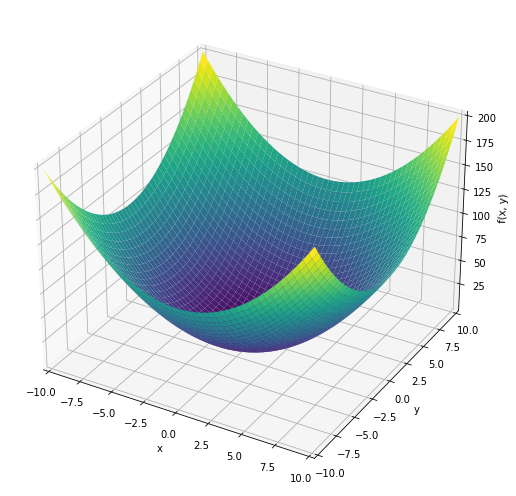

In [ ]:
from sympy.plotting import plot3d
import matplotlib.pyplot as plt

func = x**2 + y**2

plot3d(func, (x, -10, 10), (y, -10, 10), size=(10, 7))


Está claro que el mínimo es (0,0). Usemos el descenso por gradiente y lo confirmamos.


In [ ]:
sym_descenso_gradiente(func, 10, 10, 0.2, 0.001)


El valor de la función inicial es: 200

El valor de la función es: 72.0000000000000
||x1-x0||=5.65685424949238

El valor de la función es: 25.9200000000000
||x2-x1||=3.39411254969543

El valor de la función es: 9.33120000000000
||x3-x2||=2.03646752981726

El valor de la función es: 3.35923200000000
||x4-x3||=1.22188051789035

El valor de la función es: 1.20932352000000
||x5-x4||=0.733128310734212

El valor de la función es: 0.435356467200000
||x6-x5||=0.439876986440527

El valor de la función es: 0.156728328192000
||x7-x6||=0.263926191864316

El valor de la función es: 0.0564221981491200
||x8-x7||=0.158355715118590

El valor de la función es: 0.0203119913336832
||x9-x8||=0.0950134290711539

El valor de la función es: 0.00731231688012594
||x10-x9||=0.0570080574426923

El valor de la función es: 0.00263243407684534
||x11-x10||=0.0342048344656154

El valor de la función es: 0.000947676267664322
||x12-x11||=0.0205229006793692

El valor de la función es: 0.000341163456359156
||x13-x12||=0.0

(0.00101559956668416, 0.00101559956668416, 2.06288495969810e-6)

Como podemos observar el valor que obtenemos está muy cerca del (0,0). No obstante, se puede mejorar estos valores probando con distintos valores de gamma y epsilon. Aquí se puede ver uno de los mayores problemas del descenso por gradiente, que son los valores de ajuste. Un gamma muy pequeño y puede nunca encontrarse la raíz, un gamma muy grande y puede nunca convergir.

Hay métodos para paliar este problema al detectar si evolucionan correctamente y cambiar el valor de gamma de acorde.


Hagamos un cambio en la función `sym_descenso_gradiente` para conservar los cálculos intermedios y podamos visualizar la progresión.


In [ ]:
from sympy import *
from sympy.abc import x, y


def sym_descenso_gradiente(
    func, x0, y0, gamma=0.2, epsilon=0.001, num_iters=50, verbose=True
):
    calculos_intermedios = []
    if verbose:
        print(f"El valor de la función inicial es: {func.subs({x: x0, y: y0})}\n")
    i = 0
    while (
        i < num_iters
    ):  # De base solo paramos si alcanzado el número máximo de iteraciones, pero abajo confirmamos el valor de la "norma" para parar se se da la condición
        # Derivada parcial de x en el punto (xis, yis)[0]
        x1 = x0 - gamma * diff(func, x).subs({x: x0, y: y0})
        # Derivada parcial de x en el punto (xis, yis)
        y1 = y0 - gamma * diff(func, y).subs({x: x0, y: y0})
        norma = sqrt((x0 - x1) ** 2 + (y0 - y1) ** 2)  # Calculo de la norma
        calculos_intermedios.append(func.subs({x: x0, y: y0}))
        if verbose:
            # Muestra cuan cerca estamos del 0 en la función original
            print(f"El valor de la función es: {func.subs({x: x1, y: y1})}")
            print(f"||x{i+1}-x{i}||={norma}")  # Muestra el valor de la norma
            print()
        x0, y0 = x1, y1  # Actualiza los valores de x e y para el proximo bucle
        if (
            norma < epsilon
        ):  # Comprobamos norma y caso se haya alcanzado este valor paramos de forma elegante a poner "i" como el máximo de iteraciones, así el proximo bucle para
            i = num_iters
        i += 1  # incrementamos la cantidad de "i"
    return x0, y0, func.subs({x: x0, y: y0}), calculos_intermedios


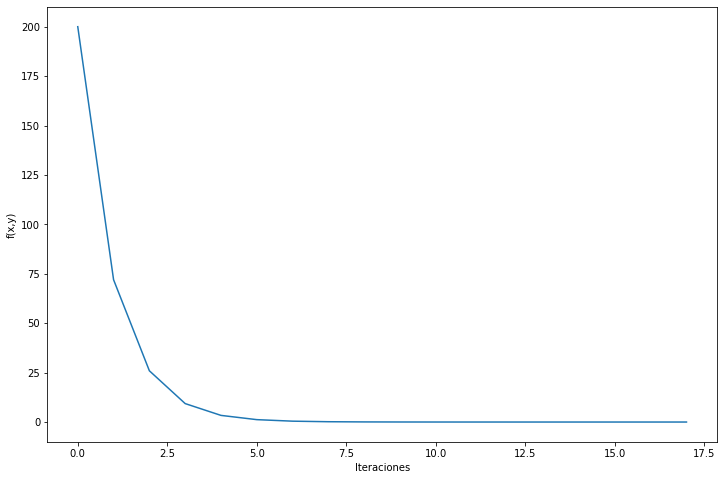

In [ ]:
x_final, y_final, f_final, calc_intermedios = sym_descenso_gradiente(
    func, 10, 10, 0.2, 0.001, verbose=False
)  # Obtenemos los valores intermedios de f(x,y)

# Representamos visualmente
plt.figure(figsize=(12, 8))
plt.xlabel("Iteraciones")
plt.ylabel("f(x,y)")
plt.plot(
    range(len(calc_intermedios)), calc_intermedios
)  # abscisas: de 0 a tamaño de calc_intermedios; ordenadas: calc_intermedios
plt.show()


Aquí se puede ver la rápida aproximación la raíz.

## Ejercicios

### Ejercicio 1

Representa y busca la raíz de $x^2-sen(x)-0.5$ con una tolerancia de $10^{-3}$ para $0\leq x\leq 4$ con el método de la Bisección.

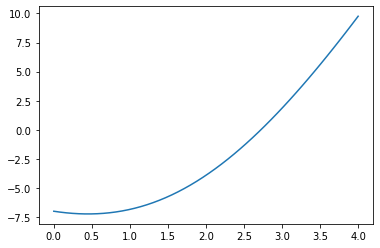

In [ ]:
# Grafica

(2.7216796875, -0.00014066046435790014, 11)

### Ejercicio 2

Con la función del ejercicio 1, Prueba con el método de Bisección de Scipy. Observa las diferencias de resultados.

2.721701816068162

### Ejercicio 3

Con la función del ejercicio 1, cuantas iteraciones son necesarias para encontrar la raíz con el intervalo $-3 \leq x \leq 0$?

(-2.53564453125, -0.0009651580269380844, 10)

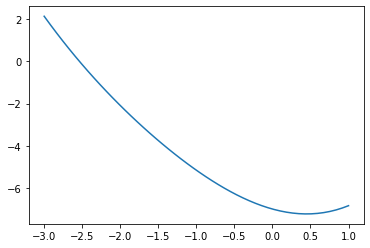

### Ejercicio 4

Con $e^x-4x^2$, prueba los métodos de:
- Bisección para $-1 \leq x \leq 0$
- Secante para  $0 \leq x \leq 1$
- Newton desde  $x = 4$

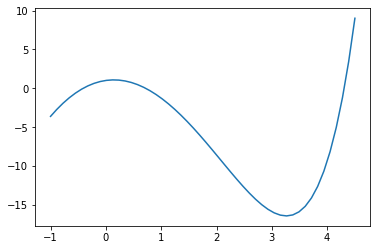

In [ ]:
# Grafica


In [ ]:
# Bisec


(-0.40777587890625, 3.261647265828671e-06, 13)

In [ ]:
# Secante


i: 0 a: 0.000 b: 1.000 c: 0.438 h: -0.438 f(a): 1.000 f(b): -1.282 f(c): 0.782
i: 1 a: 0.438 b: 0.000 c: 2.008 h: -1.569 f(a): 0.782 f(b): 1.000 f(c): -8.677
i: 2 a: 0.438 b: 2.008 c: 0.568 h: -0.130 f(a): 0.782 f(b): -8.677 f(c): 0.474
i: 3 a: 0.568 b: 0.438 c: 0.768 h: -0.200 f(a): 0.474 f(b): 0.782 f(c): -0.204
i: 4 a: 0.768 b: 0.568 c: 0.708 h: 0.060 f(a): -0.204 f(b): 0.474 f(c): 0.025
i: 5 a: 0.708 b: 0.768 c: 0.715 h: -0.007 f(a): 0.025 f(b): -0.204 f(c): 0.001
i: 6 a: 0.715 b: 0.708 c: 0.715 h: -0.000 f(a): 0.001 f(b): 0.025 f(c): -0.000


(0.7148075428694096, -5.991561062845818e-06, 6)

In [ ]:
# Newton


4.3065847282207

### Ejercicio 5

Con $x*e^x-7$, prueba los métodos de:
- Bisección para $-2.5 \leq x \leq 10$
- Secante para  $1 \leq x \leq 2$
- Newton desde  $x = 0$

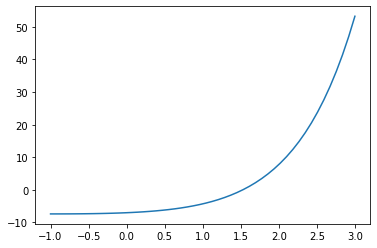

(1.524362564086914, 0.00020123151302886555, 17)

i: 0 a: 1.000 b: 2.000 c: 1.355 h: -0.355 f(a): -4.282 f(b): 7.778 f(c): -1.747
i: 1 a: 1.355 b: 1.000 c: 1.600 h: -0.245 f(a): -1.747 f(b): -4.282 f(c): 0.920
i: 2 a: 1.600 b: 1.355 c: 1.515 h: 0.084 f(a): 0.920 f(b): -1.747 f(c): -0.105
i: 3 a: 1.515 b: 1.600 c: 1.524 h: -0.009 f(a): -0.105 f(b): 0.920 f(c): -0.005
i: 4 a: 1.524 b: 1.515 c: 1.524 h: -0.000 f(a): -0.005 f(b): -0.105 f(c): 0.000


(1.5243482028234052, 3.475143217368526e-05, 4)

1.5243452049841444

## Ejercicio 6 - Bonus

Prueba el método de la secante del ejercicio anterior para el intervalo $-2.5 \leq x \leq 10$. Verás que falla. Busca la razón.

i: 0 a: -2.500 b: 10.000 c: -2.500 h: -0.000 f(a): -7.205 f(b): 220257.658 f(c): -7.205
i: 1 a: -2.500 b: -2.500 c: -61.014 h: 58.514 f(a): -7.205 f(b): -7.205 f(c): -7.000
i: 2 a: -61.014 b: -2.500 c: -2056.995 h: 1995.981 f(a): -7.000 f(b): -7.205 f(c): -7.000
i: 3 a: -61.014 b: -2056.995 c: -inf h: inf f(a): -7.000 f(b): -7.000 f(c): nan


/tmp/ipykernel_30164/3537860132.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  h = (f(puntoA) * (puntoB - puntoA)) / (
/tmp/ipykernel_30164/2798489867.py:1: RuntimeWarning: invalid value encountered in double_scalars
  f = lambda x : x * np.exp(x) - 7


(-inf, nan, 3)